In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft

[[-0.15 -0.15]
 [ 0.    0.  ]]
[[0.2 0. ]
 [0.  0.2]]


/var/folders/s0/cf8vcvv57gz3gzbb4w_n9jm00000gn/T/ipykernel_41998/2695808450.py:28: ComplexWarning: Casting complex values to real discards the imaginary part
  eigenvectors[i] = vector


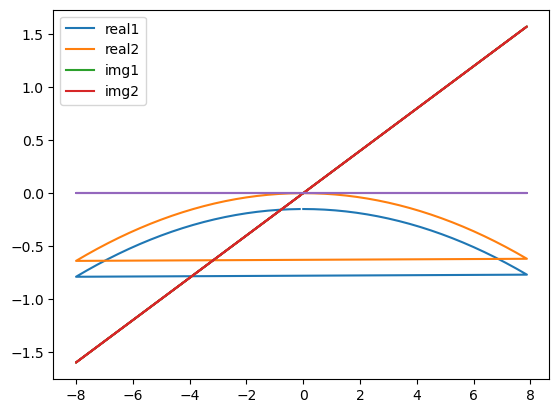

In [94]:

A = 0.15
B = 1

X0 = 1
Y0 = 0
fu = np.array([[-B * Y0**2 - A, -2 * B * X0 * Y0 - A], 
               [Y0 + B * Y0**2, 1 - X0 + 2 * B * X0 * Y0]])

N = 128
L = 16 * np.pi
dx = L / N

c = np.identity(2) * 0.2
k = np.fft.fftfreq(N, dx) * np.pi * 2
D = np.identity(2) * 0.01

print(fu)
print(c)
eigenvalues_real = np.zeros((N, 2))
eigenvalues_img  = np.zeros((N, 2))
eigenvectors = np.zeros((N, 2, 2))
for i in range(k.shape[0]):
    A = fu+ 1j*k[i]*c -k[i]**2 * D
    value, vector = np.linalg.eig(A)
    eigenvalues_real[i] = np.real(value)
    eigenvalues_img[i] = np.imag(value)

    eigenvectors[i] = vector
    #print(value)
    #print(eigenvalues[i])
    
    #print(eigenvalues, eigenvectors)

plt.plot(k, eigenvalues_real[:, 0], label='real1')
plt.plot(k, eigenvalues_real[:, 1], label='real2')
plt.plot(k, eigenvalues_img[:, 0], label='img1')
plt.plot(k, eigenvalues_img[:, 1], label='img2')
plt.plot(k, np.zeros(k.shape[0]))
plt.legend()


/var/folders/s0/cf8vcvv57gz3gzbb4w_n9jm00000gn/T/ipykernel_41998/3191717081.py:28: ComplexWarning: Casting complex values to real discards the imaginary part
  eigenvectors[j, i] = vector


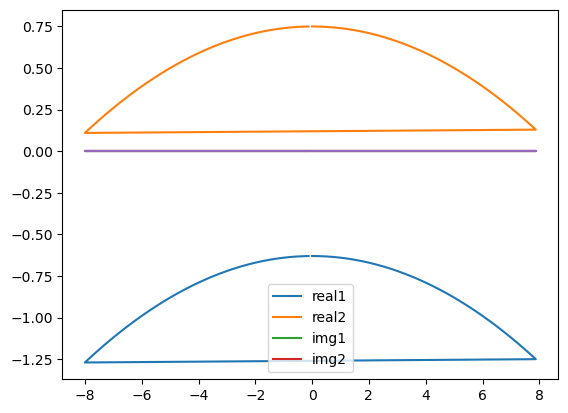

In [111]:
# NO PERTURB

A = 0.15
B = 1

X0 = 0.0
Y0 = 1.0
fu = np.array([[-B * Y0**2 - A, -2 * B * X0 * Y0 - A], 
               [Y0 + B * Y0**2, 1 - X0 + 2 * B * X0 * Y0]])

N = 128
L = 16 * np.pi
dx = L / N

c = np.linspace(0, 5, 99)
k = np.fft.fftfreq(N, dx) * np.pi * 2
D = np.identity(2) * 0.01


eigenvalues_real = np.zeros((100, N, 2))
eigenvalues_img  = np.zeros((100, N, 2))
eigenvectors = np.zeros((100, N, 2, 2))

for j in range(c.shape[0]):
    for i in range(k.shape[0]):
        A = fu+ 1j*k[i]*c[j] *np.identity(2) -k[i]**2 * D
        value, vector = np.linalg.eig(A)
        eigenvalues_real[j, i] = np.real(value)
        eigenvalues_img[j, i] = np.imag(value)

        eigenvectors[j, i] = vector
    #print(value)
    #print(eigenvalues[i])
    
    #print(eigenvalues, eigenvectors)

plt.plot(k, eigenvalues_real[0, :, 0], label='real1')
plt.plot(k, eigenvalues_real[0, :, 1], label='real2')
plt.plot(k, eigenvalues_img[0, :, 0], label='img1')
plt.plot(k, eigenvalues_img[0, :, 1], label='img2')
plt.plot(k, np.zeros(k.shape[0]))
plt.legend()


In [101]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.animation import FuncAnimation, FFMpegWriter
fig, ax = plt.subplots()


def init():
    #img = ax.plot(x, h_result[:, 0])

    ax.plot(k, eigenvalues_real[0, :, 0], label='real1')
    ax.plot(k, eigenvalues_real[0, :, 1], label='real2')
    ax.plot(k, eigenvalues_img[0, :, 0], label='img1')
    ax.plot(k, eigenvalues_img[0, :, 1], label='img2')
    ax.plot(k, np.zeros(k.shape[0]))
    ax.set_title(f'c = {c[0]}')
    ax.set_xlabel('k')
    ax.legend()
    #ax.set_ylim(0, 1)
    #return [img]

def plotFrame(j):
    ax.clear()
    ax.plot(k, eigenvalues_real[j, :, 0], label='real1')
    ax.plot(k, eigenvalues_real[j, :, 1], label='real2')
    ax.plot(k, eigenvalues_img[j, :, 0], label='img1')
    ax.plot(k, eigenvalues_img[j, :, 1], label='img2')
    ax.plot(k, np.zeros(k.shape[0]))
    ax.set_title(f'c = {c[j]}')
    ax.set_xlabel('k')
    ax.legend()

video = FuncAnimation(fig, plotFrame, interval=100, frames=range(99), blit=False, init_func=init)

plt.close()
display(HTML(video.to_html5_video()))
#writervideo = FFMpegWriter(fps=30)
#video.save(f'triggerwave_slow_down.mp4', writer=writervideo) 

/var/folders/s0/cf8vcvv57gz3gzbb4w_n9jm00000gn/T/ipykernel_43194/856902036.py:44: ComplexWarning: Casting complex values to real discards the imaginary part
  eigenvectors[j, i] = vector


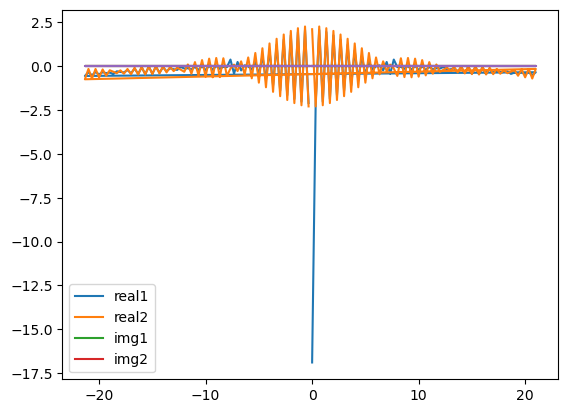

In [100]:
# WITH PERTURBATION


A = 0.15
B = 1

N = 128
L = 3 * 2 * np.pi
dx = L / N

Y0 = np.zeros(N)
X0 = np.ones(N) 
Y0[int(N/2)] = 0.5
Y0[int(N/2-1)] = 0.4
Y0[int(N/2+1)] = 0.4
Y0[int(N/2-2)] = 0.3
Y0[int(N/2+2)] = 0.3
Y0[int(N/2-3)] = 0.2
Y0[int(N/2+3)] = 0.2

X0 = 1 - Y0

fu = fft(np.array([[-B * Y0**2 - A, -2 * B * X0 * Y0 - A], 
               [Y0 + B * Y0**2, 1 - X0 + 2 * B * X0 * Y0]]))



c = np.linspace(0, 5, 99)
k = np.fft.fftfreq(N, dx) * np.pi * 2
D = np.identity(2) * 0.001


eigenvalues_real = np.zeros((100, N, 2))
eigenvalues_img  = np.zeros((100, N, 2))
eigenvectors = np.zeros((100, N, 2, 2))

for j in range(c.shape[0]):
    for i in range(k.shape[0]):
        A = fu[:, :, i]+ 1j*k[i]*c[j] *np.identity(2) -k[i]**2 * D
        value, vector = np.linalg.eig(A)
        eigenvalues_real[j, i] = np.real(value)
        eigenvalues_img[j, i] = np.imag(value)

        eigenvectors[j, i] = vector
    #print(value)
    #print(eigenvalues[i])
    
    #print(eigenvalues, eigenvectors)

plt.plot(k, eigenvalues_real[0, :, 0], label='real1')
plt.plot(k, eigenvalues_real[0, :, 1], label='real2')
plt.plot(k, eigenvalues_img[0, :, 0], label='img1')
plt.plot(k, eigenvalues_img[0, :, 1], label='img2')
plt.plot(k, np.zeros(k.shape[0]))
plt.legend()

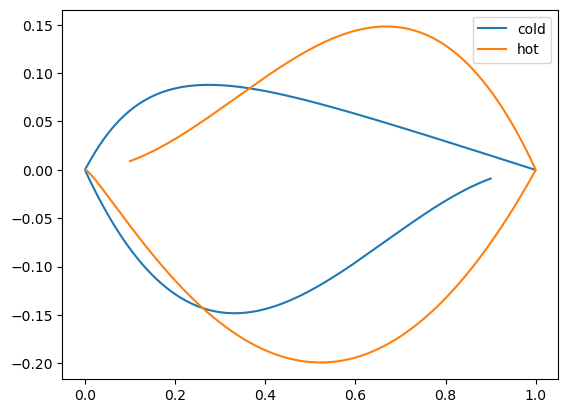

In [84]:
A = 0.15
B = 1

X = 0.9
Y = 0.1

dt = 0.01
t = 100

X_dot = -B * X * Y**2 + A * (1 - X - Y) 
Y_dot = -Y * (1 - X - Y) + B * X * Y**2

result_X = np.zeros((int(t/dt), 2))
result_Y = np.zeros((int(t/dt), 2))

for i in range(int(t/dt)):
    X_dot = -B * X * Y**2 + A * (1 - X - Y) 
    Y_dot = -Y * (1 - X - Y) + B * X * Y**2
    X = X + X_dot * dt
    Y = Y + Y_dot * dt
    result_X[i] = [X, X_dot]
    result_Y[i] = [Y, Y_dot]

plt.plot(result_X[:, 0], result_X[:, 1], label='cold')
plt.plot(result_Y[:, 0], result_Y[:, 1], label='hot')
plt.legend()


Text(0, 0.5, 'Hot Gas')

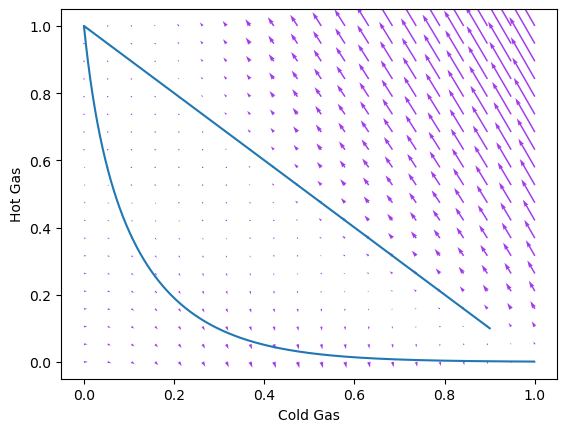

In [79]:
N = 20
X = np.linspace(0, 1, N)
Y = np.linspace(0, 1, N)
X_dot = np.zeros((N, N))
Y_dot = np.zeros((N, N))

for i in range(X.shape[0]):
    for j in range(Y.shape[0]):
        X_dot[i, j] = -B * X[i] * Y[j]**2 + A * (1 - X[i] - Y[j]) 
        Y_dot[i, j] = -Y[j] * (1 - X[i] - Y[j]) + B * X[i] * Y[j]**2

plt.quiver(X, Y, X_dot, Y_dot, scale=20, linewidth=0.01, color='#A23BEC') 
plt.plot(result_X[:, 0], result_Y[:, 0])
plt.xlabel('Cold Gas')
plt.ylabel('Hot Gas')